In [19]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

In [ ]:
rossi_dataset = load_rossi()

In [13]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [6]:
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary()  # access the results using cph.summary

"""
n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95
fin  -0.3790     0.6845    0.1914 -1.9806 0.0476     -0.7542     -0.0039   *
age  -0.0572     0.9444    0.0220 -2.6042 0.0092     -0.1003     -0.0142  **
race  0.3141     1.3691    0.3080  1.0198 0.3078     -0.2897      0.9180
wexp -0.1511     0.8597    0.2121 -0.7124 0.4762     -0.5670      0.2647
mar  -0.4328     0.6487    0.3818 -1.1335 0.2570     -1.1813      0.3157
paro -0.0850     0.9185    0.1957 -0.4341 0.6642     -0.4687      0.2988
prio  0.0911     1.0954    0.0286  3.1824 0.0015      0.0350      0.1472  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Concordance = 0.640
Likelihood ratio test = 33.266 on 7 df, p=0.00002
"""

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Convergence completed after 6 iterations.
n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    

"\nn=432, number of events=114\n\n        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95\nfin  -0.3790     0.6845    0.1914 -1.9806 0.0476     -0.7542     -0.0039   *\nage  -0.0572     0.9444    0.0220 -2.6042 0.0092     -0.1003     -0.0142  **\nrace  0.3141     1.3691    0.3080  1.0198 0.3078     -0.2897      0.9180\nwexp -0.1511     0.8597    0.2121 -0.7124 0.4762     -0.5670      0.2647\nmar  -0.4328     0.6487    0.3818 -1.1335 0.2570     -1.1813      0.3157\nparo -0.0850     0.9185    0.1957 -0.4341 0.6642     -0.4687      0.2988\nprio  0.0911     1.0954    0.0286  3.1824 0.0015      0.0350      0.1472  **\n---\nSignif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1\n\nConcordance = 0.640\nLikelihood ratio test = 33.266 on 7 df, p=0.00002\n"

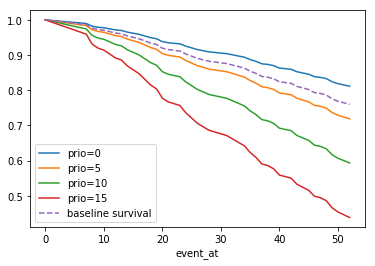

In [7]:

cph.plot_covariate_groups('prio', [0, 5, 10, 15])

In [10]:
z11['BaseDateTime'] = pd.to_datetime(z11.reset_index()['BaseDateTime'])

In [71]:
z11 = None
colregs = pd.read_csv('Data/Example_COLREGs_Interactions_UTM11.csv')
colregs['COLREG_Type'].unique()
col

array(['Overtaking', 'Crossing', 'Meeting'], dtype=object)

In [122]:
def initialize_colreg_data(filepath):
    start = time.time()
    df = pd.read_csv(filepath)
    df.drop(['Heading','COG','SOG','VesselName','IMO','CallSign','VesselType','Status','Draft','Cargo','LAT','LON'], axis=1, inplace=True)
    df.set_index('MMSI',inplace=True)
    df['Crossing'] = (df['COLREG_Type'] == 'Crossing')
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
    #df = df.groupby(['MMSI','BaseDateTime']).sum().reset_index()
    end = time.time()
    print('Data Loaded.  Time: '+str(round(end-start,2)))
    return df

colregs = initialize_data('Data/Example_COLREGs_Interactions_UTM11.csv')
colregs.info()

Data Loaded.  Time: 4.44
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20585 entries, 372747000 to 566341000
Data columns (total 4 columns):
COLREG_Type     20585 non-null object
BaseDateTime    20585 non-null datetime64[ns]
Length          20585 non-null float64
Width           20585 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 804.1+ KB


In [123]:
colregs['Crossing'] = (colregs['COLREG_Type'] == 'Crossing')*1
colregs.drop(['COLREG_Type'], axis=1, inplace=True)
colregs.head()

,BaseDateTime,Length,Width,Crossing
MMSI,,,,
372747000,2017-12-03 09:00:16,199.94,32.26,0
372747000,2017-12-03 09:00:36,199.94,32.26,0
372747000,2017-12-03 09:01:00,199.94,32.26,0
372747000,2017-12-03 09:01:20,199.94,32.26,0
372747000,2017-12-03 09:01:40,199.94,32.26,0


In [124]:
colregs['BaseDateTime_Rounded'] = colregs['BaseDateTime'].dt.hour
colregs.drop(['BaseDateTime'], axis=1, inplace=True)
colregs = colregs.groupby(['MMSI','BaseDateTime_Rounded']).mean().reset_index()
colregs.set_index('MMSI',inplace=True)
colregs.head()

,BaseDateTime_Rounded,Length,Width,Crossing
MMSI,,,,
259739000,0,179.9,32.2,0
259739000,1,179.9,32.2,0
259739000,2,179.9,32.2,0
259739000,3,179.9,32.2,0
259739000,4,179.9,32.2,0


In [125]:
cph = CoxPHFitter()
cph.fit(colregs, duration_col='BaseDateTime_Rounded', event_col='Crossing', step_size=0.1, show_progress=True)

Iteration 1: norm_delta = 0.12691, step_size = 0.10000, ll = -124.29137, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13534, step_size = 0.10000, ll = -119.96660, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.13986, step_size = 0.10000, ll = -116.97513, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.13827, step_size = 0.09800, ll = -114.72879, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.13474, step_size = 0.09604, ll = -112.99971, seconds_since_start = 0.0
Iteration 6: norm_delta = 0.15940, step_size = 0.11525, ll = -111.62685, seconds_since_start = 0.0
Iteration 7: norm_delta = 0.15245, step_size = 0.11294, ll = -110.27919, seconds_since_start = 0.1
Iteration 8: norm_delta = 0.14495, step_size = 0.11068, ll = -109.21455, seconds_since_start = 0.1
Iteration 9: norm_delta = 0.16803, step_size = 0.13282, ll = -108.36073, seconds_since_start = 0.1
Iteration 10: norm_delta = 0.15716, step_size = 0.13016, ll = -107.52373, seconds_since_start = 0.1
Iteration

<lifelines.CoxPHFitter: fitted with 114 observations, 82 censored>

In [151]:
quantiles = colregs.quantile([0.25,0.5,0.75])
w = round(quantiles.Width,0)
l = round(quantiles.Length,0)


In [155]:
list(w)

[30.0, 30.0, 30.0]

n=114, number of events=32

          coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
Length  0.0584     1.0602    0.0179  3.2686 0.0011      0.0234      0.0935  **
Width  -0.1942     0.8235    0.0799 -2.4295 0.0151     -0.3509     -0.0375   *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.741
Likelihood ratio test = 40.110 on 2 df, p=0.00000


Text(0.5,1,'Hazard Functions by Length')

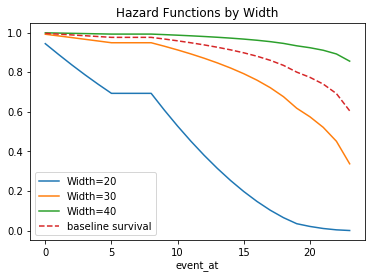

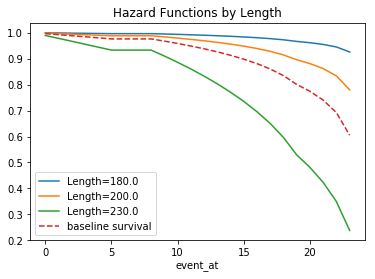

In [157]:
cph.print_summary()
cph.plot_covariate_groups('Width', [20,30,40]).set_title('Hazard Functions by Width')
cph.plot_covariate_groups('Length', list(l)).set_title('Hazard Functions by Length')